# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/ASUS/Desktop/PROJECT/csv files/Data-Science-ML-Capstone-Projects-master/Data-Science-ML-Capstone-Projects-master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
# data has 30 rows and 17 columns
df.shape

(30, 17)

In [7]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

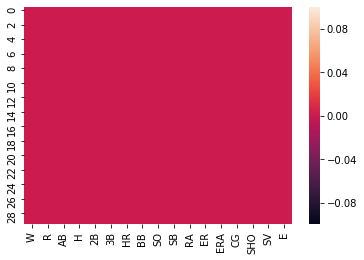

In [8]:
sns.heatmap(df.isnull())

# Summary Statistics

In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# To Check correlation

In [10]:
dfcor=df.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


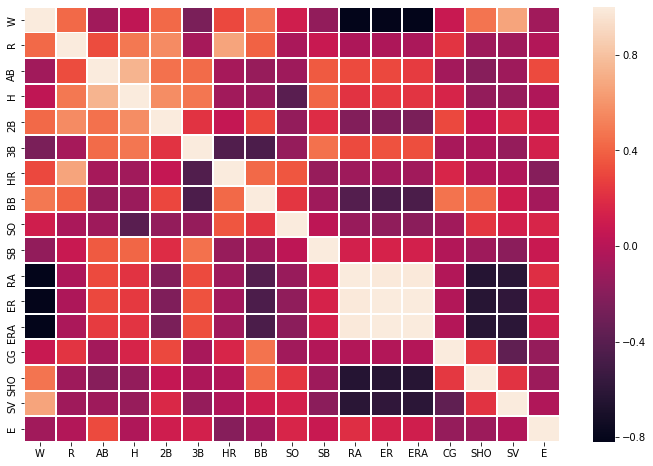

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,linewidths=1)

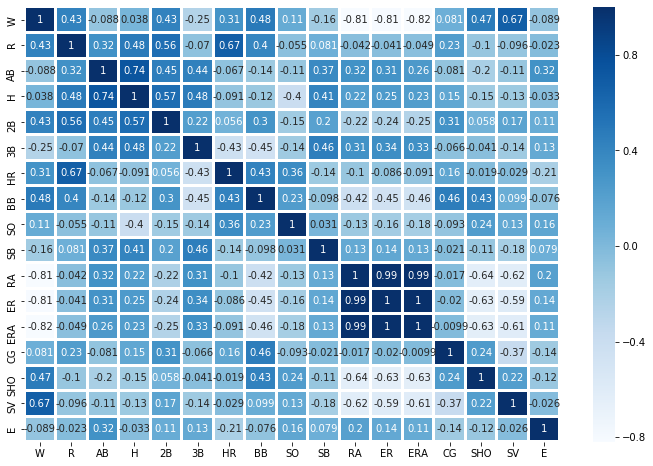

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='Blues',annot=True,linewidths=2)

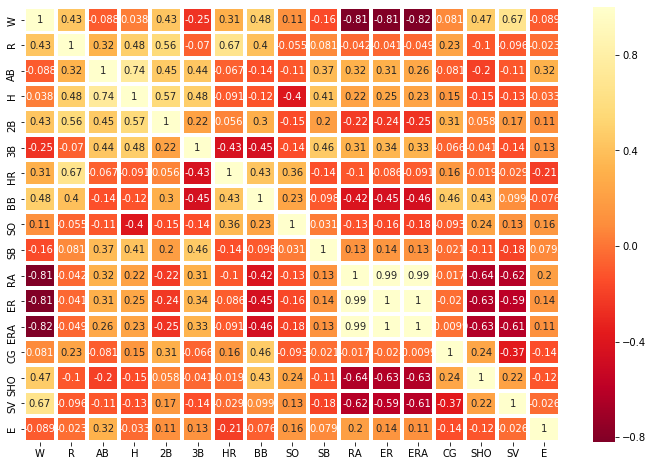

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True,linewidths=3)

Observations

# univariate analysis 

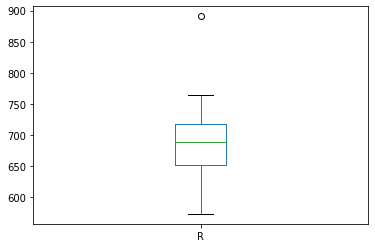

In [14]:
# only few outliers are present
df['R'].plot.box() 

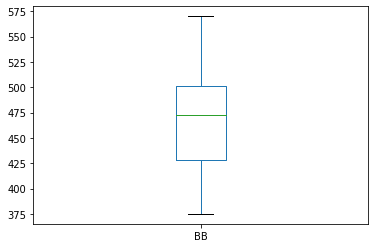

In [15]:
# outliers are not present
df['BB'].plot.box() 

In [16]:
collist=df.columns.values
ncol=17
nrows=15

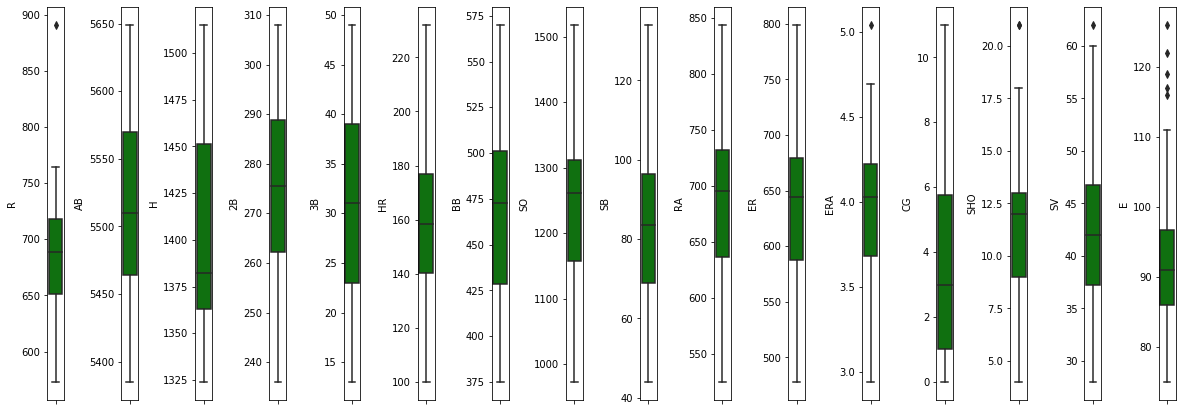

In [17]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

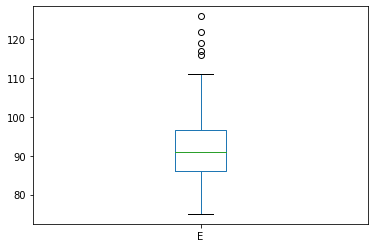

In [18]:
# outliers are present
df['E'].plot.box() 

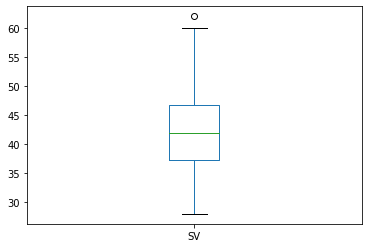

In [19]:
# few outliers are present
df['SV'].plot.box() 

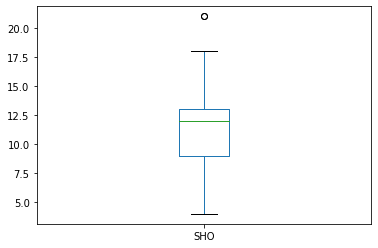

In [20]:
# few outliers
df['SHO'].plot.box() 

# To check Skewness

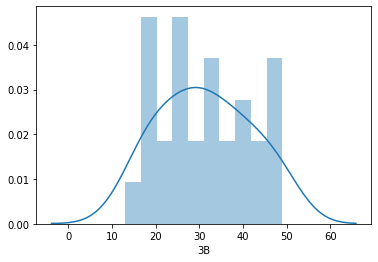

In [21]:
sns.distplot(df['3B'],bins=10)

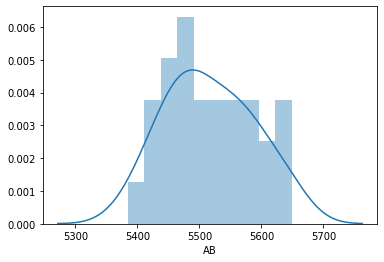

In [22]:
sns.distplot(df['AB'],bins=10)

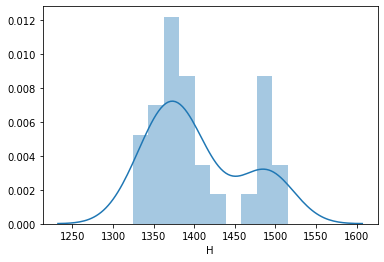

In [23]:
sns.distplot(df['H'],bins=10)

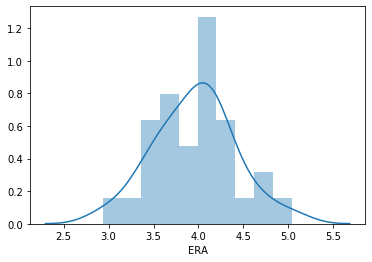

In [24]:
sns.distplot(df['ERA'],bins=10)

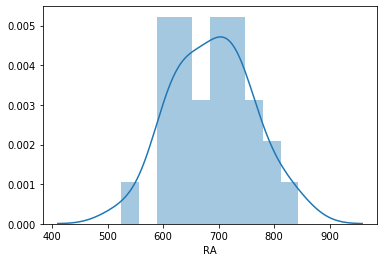

In [25]:
sns.distplot(df['RA'],bins=10)

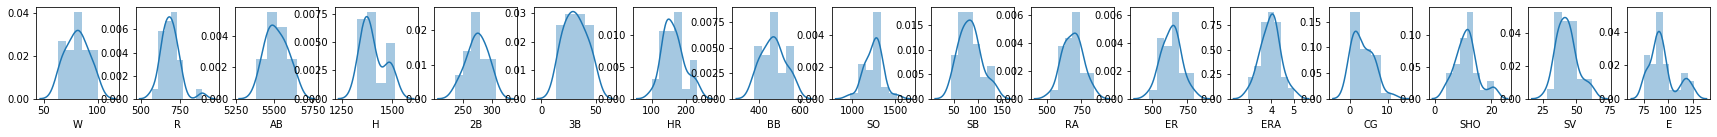

In [26]:
# plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

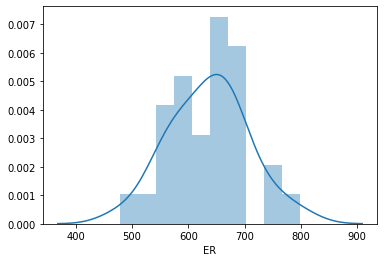

In [27]:
sns.distplot(df['ER'],bins=10)

# Bivariate analysis

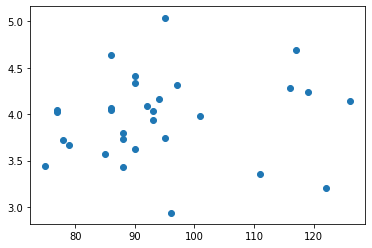

In [28]:
plt.scatter(df['E'],df['ERA'])

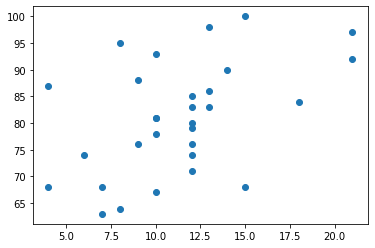

In [29]:
plt.scatter(df['SHO'],df['W'])

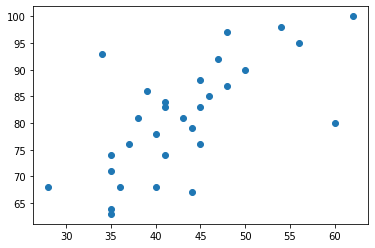

In [30]:
# bivariate analysis
plt.scatter(df['SV'],df['W'])

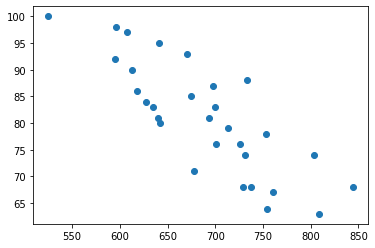

In [31]:
# bivariate analysis
plt.scatter(df['RA'],df['W'])

Observations

# Removing outliers

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [33]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [34]:
z[5][1]

3.5096470447193067

In [35]:
df_new=df[(z<3).all(axis=1)]

In [36]:
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [37]:
df_new.shape

(29, 17)

df_new.skew()

In [38]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [39]:
y = df_new.W
x = df_new.drop('W',axis=1)

In [40]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [41]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [42]:
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [43]:
# In some columns, skewness is present. so, we are removing it by power transformation

In [44]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [45]:
df_new.skew()
x=df_new

In [46]:
# See, here all the skewness have been removed
x.skew()

R     -0.024842
AB     0.000000
H      0.000000
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
RA    -0.011974
ER    -0.004988
ERA   -0.000401
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=43)

# Scaling the Data

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [49]:
x_train

array([[ 1.41807556,  0.        ,  0.        , -0.08867592,  1.43961658,
         1.27241041, -1.40257478,  0.3263254 ,  0.60671854,  2.13409343,
         2.25681609,  2.2964224 ,  0.51697909, -1.89057762, -1.14736833,
         0.37008282],
       [ 2.1145797 ,  0.        ,  0.        , -0.19778107, -1.23226204,
         2.11524195,  1.5475186 , -0.1939395 , -0.96566469,  0.19487497,
         0.28374815,  0.2153743 ,  0.17087774, -1.89057762,  0.66357415,
         0.1874699 ],
       [-0.84357458,  0.        ,  0.        , -0.96128775, -0.44162918,
         0.59219824,  0.60310949,  0.06412022,  1.87229951,  0.94353241,
         0.9311974 ,  0.83587192, -0.25279256, -0.66610896, -1.32950704,
        -0.10821402],
       [ 0.58269948,  0.        ,  0.        , -0.5659523 , -1.89126484,
         0.95777329,  1.31065723,  0.91178694, -1.31180549, -0.65537783,
        -0.73483056, -0.6361934 ,  0.51697909,  0.5372601 , -0.31762221,
        -0.10821402],
       [-2.1895433 ,  0.        ,  0

In [50]:
y_train

29     68
6      87
19     64
21     83
23     67
26     84
16     98
1      83
12     85
3      76
28     74
15    100
2      81
27     79
20     90
17     97
22     71
18     68
0      95
4      74
Name: W, dtype: int64

In [51]:
# Linear Regression

In [52]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [53]:
lm.score(x_train,y_train)

0.978800555265969

In [54]:
lmpred=lm.predict(x_test)
lmpred

array([98.04110681, 75.32863355, 87.1247795 , 77.67422527, 83.66426478,
       81.55672783, 88.0809231 , 55.45787908, 83.8714601 ])

In [55]:
lm.score(x_test,y_test)

0.2500972285438652

In [56]:
lm.coef_

array([ 4.03321202e+00, -2.46469511e-14,  1.15463195e-14, -1.67150897e+00,
        2.37746258e+00,  1.44561331e+00, -7.56669367e-01, -2.94500178e+00,
       -8.01692197e-01,  1.42302787e+01, -1.17191823e+01, -9.40615580e+00,
        1.69367846e+00,  2.68262569e+00,  3.59449883e+00,  1.24686788e+00])

In [57]:
from sklearn.metrics import mean_squared_error,r2_score

In [58]:
print("MSE=",mean_squared_error(y_test,lmpred))

print("R2 score=",r2_score(y_test,lmpred))

MSE= 57.56661028289193
R2 score= 0.2500972285438652


In [84]:
#lasso and Ridge

In [59]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.metrics import r2_score

In [60]:
lasscv = LassoCV(alphas=None,cv=10,max_iter=10000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [61]:
alpha = lasscv.alpha_
alpha

0.0470907614717716

In [62]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0470907614717716)

In [63]:
Final_mod=lasso_reg.score(x_test,y_test)
Final_mod*100

70.88270836436747

# Saving the model

In [64]:
import joblib
joblib.dump(Final_mod,"FinalModel.pk1")

['FinalModel.pk1']